<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/azure_openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using Azure OpenAI GPT-4o mini for image reasoning

In this notebook, we show how to use GPT-4o mini with the **Azure** OpenAI LLM class/abstraction for image understanding/reasoning. For a more complete example, please visit [this notebook](https://github.com/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/openai_multi_modal.ipynb).

In [ ]:
%pip install llama-index-llms-azure-openai

## Prerequisites

1. Setup an Azure subscription - you can create one for free [here](https://azure.microsoft.com/en-us/free/cognitive-services/)
2. Apply for access to Azure OpenAI Service [here](https://customervoice.microsoft.com/Pages/ResponsePage.aspx?id=v4j5cvGGr0GRqy180BHbR7en2Ais5pxKtso_Pz4b1_xUOFA5Qk1UWDRBMjg0WFhPMkIzTzhKQ1dWNyQlQCN0PWcu) 
3. Create a resource in the Azure portal [here](https://portal.azure.com/?microsoft_azure_marketplace_ItemHideKey=microsoft_openai_tip#create/Microsoft.CognitiveServicesOpenAI)
4. Deploy a model in Azure OpenAI Studio [here](https://oai.azure.com/)


You can find more details in [this guide.](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal)

Note down the **"model name"** and **"deployment name"**, you'll need it when connecting to your LLM.

##  Use GPT-4o mini to understand Images from URLs / base64

In [ ]:
import os

os.environ["AZURE_OPENAI_API_KEY"] = "xxx"
os.environ["AZURE_OPENAI_ENDPOINT"] = "https://YOUR_URL.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = "2024-02-15-preview"

## Initialize `AzureOpenAI` and Load Images from URLs

Unlike regular `OpenAI`, you need to pass the `engine` argument in addition to `model`. The `engine` is the name you 
gave to your model when you deployed it in Azure OpenAI Studio.

In [ ]:
from llama_index.llms.azure_openai import AzureOpenAI

In [ ]:
azure_openai_llm = AzureOpenAI(
    engine="my-gpt-4o-mini",
    model="gpt-4o-mini",
    max_new_tokens=300,
)

Alternatively, you can also skip setting environment variables, and pass the parameters in directly via constructor.

In [ ]:
azure_openai_llm = AzureOpenAI(
    azure_endpoint="https://YOUR_URL.openai.azure.com/",
    engine="my-gpt-4o-mini",
    api_version="2024-02-15-preview",
    model="gpt-4o-mini",
    max_new_tokens=300,
    api_key="xxx",
    supports_content_blocks=True,
)

In [ ]:
import base64
import requests
from llama_index.core.schema import Document, MediaResource

image_url = "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg"

response = requests.get(image_url)
if response.status_code != 200:
    raise ValueError("Error: Could not retrieve image from URL.")
img_data = base64.b64encode(response.content)

image_document = Document(image_resource=MediaResource(data=img_data))


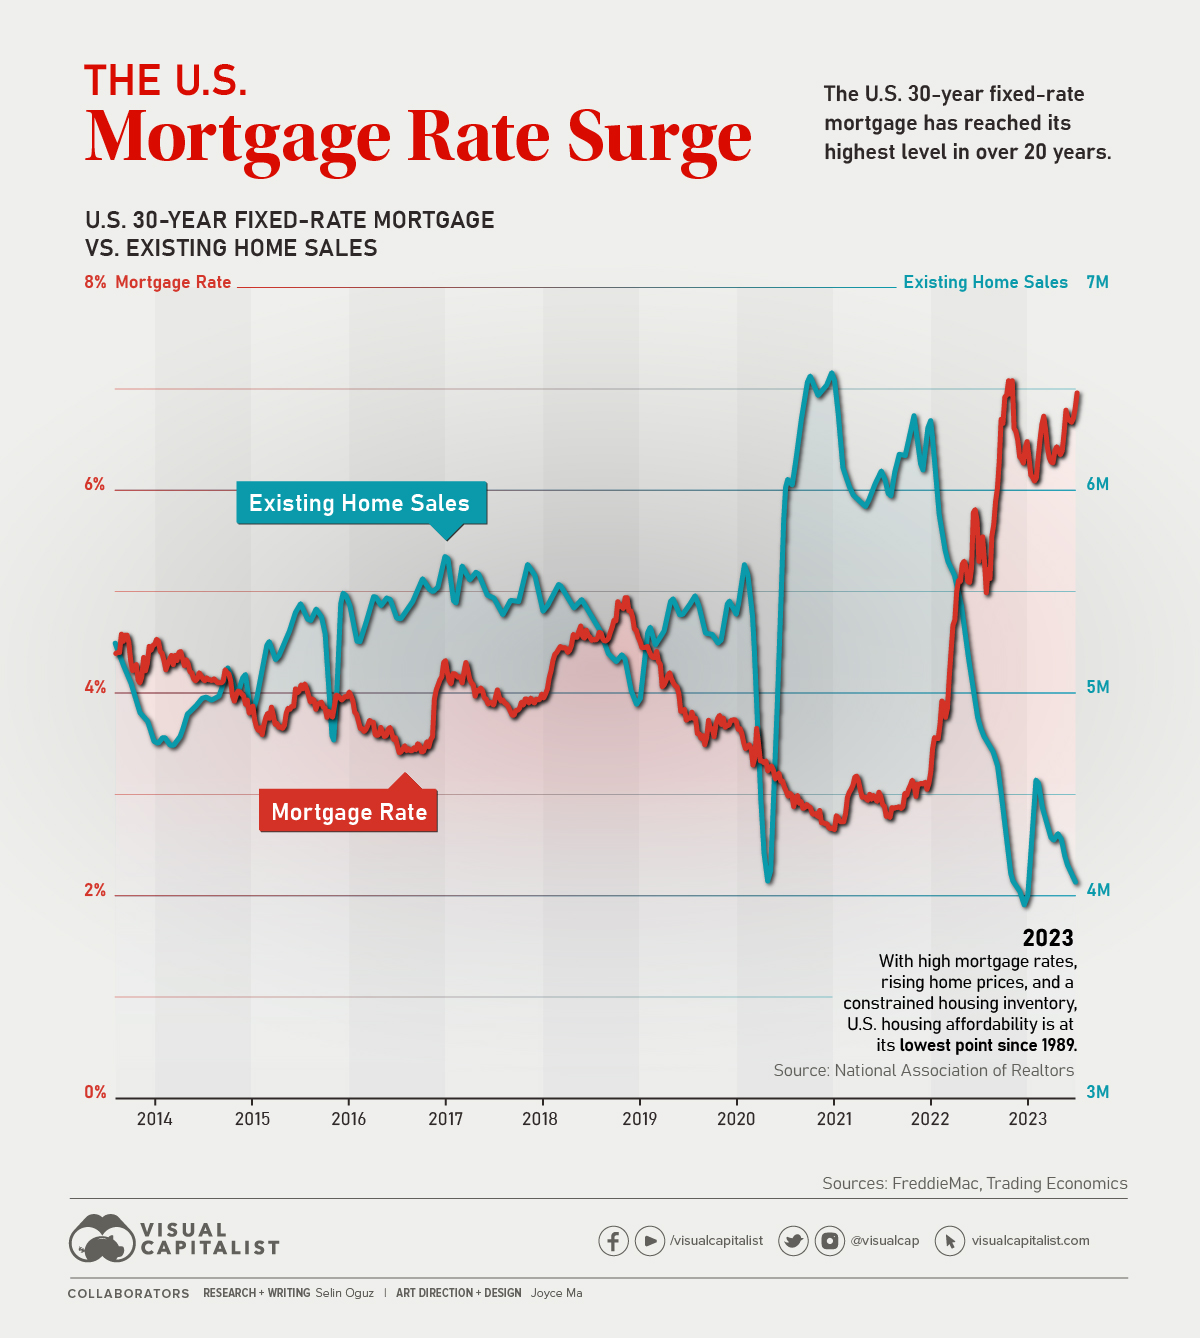

In [ ]:
from IPython.display import HTML

src = f'<img width=400 src="data:{image_document.image_resource.mimetype};base64,{image_document.image_resource.data.decode("utf-8")}"/>'
HTML(src)

### Complete a prompt with an image

In [ ]:
from llama_index.core.llms import (
    ChatMessage,
    ImageBlock,
    TextBlock,
    MessageRole,
)

msg = ChatMessage(
    role=MessageRole.USER,
    blocks=[
        TextBlock(text="Describe the images as an alternative text"),
        ImageBlock(image=image_document.image_resource.data),
    ],
)

response = azure_openai_llm.chat(messages=[msg])

In [ ]:
print(response)

assistant: The image presents a graph titled "The U.S. Mortgage Rate Surge," comparing the U.S. 30-year fixed-rate mortgage rates with existing home sales from 2014 to 2023. 

- The vertical axis on the left represents the mortgage rate, while the right vertical axis indicates the number of existing home sales, measured in millions.
- A blue line illustrates the trend of existing home sales, showing fluctuations over the years, peaking around 2020 and declining thereafter.
- A red line represents the mortgage rate, which has seen a significant increase, particularly in 2022 and 2023, reaching its highest level in over 20 years.
- The background includes a subtle grid, and the data sources are noted at the bottom. The overall design is clean and informative, aimed at highlighting the relationship between rising mortgage rates and declining home sales.
